In [1]:
import pandas as pd
import os

In [3]:
all_months = pd.DataFrame()
for files in os.listdir('./Data'):
    print(files)
    df = pd.read_csv('./Data/'+files)
    all_months = pd.concat([all_months, df])

all_months.to_csv('Pudim.csv', index=False)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
Data = pd.read_csv('Pudim.csv')
Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
Data = Data.dropna()
Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
Data['Months'] = 2
Data['Months'] = Data['Order Date'].str[0:2]
# ABOVE IS A DIFFERENT SOLUTION, its is cleaner and faster.
# MY first SOLUTION:
#Months = []
#for index, row in Data.iterrows():
    #Months.append(row['Order Date'][1])
#Data['Months'] = Months

In [7]:
Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [8]:
Data = Data[Data['Months'].str[0:2] != 'Or']

In [9]:
Data['Months'] = Data['Months'].astype('int32')

C:\Users\caval\AppData\Local\Temp\ipykernel_4620\1507399941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Months'] = Data['Months'].astype('int32')


In [10]:
Data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Months               int32
dtype: object

In [11]:
Data['Quantity Ordered'] = pd.to_numeric(Data['Quantity Ordered'])
Data['Price Each'] = pd.to_numeric(Data['Price Each'])

C:\Users\caval\AppData\Local\Temp\ipykernel_4620\2109019767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantity Ordered'] = pd.to_numeric(Data['Quantity Ordered'])
C:\Users\caval\AppData\Local\Temp\ipykernel_4620\2109019767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Price Each'] = pd.to_numeric(Data['Price Each'])


In [12]:
Data['Sales'] = Data['Quantity Ordered'] * Data['Price Each']

C:\Users\caval\AppData\Local\Temp\ipykernel_4620\1456306180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Sales'] = Data['Quantity Ordered'] * Data['Price Each']


In [13]:
Data_Perf = pd.DataFrame()
Data.groupby(['Months']).mean()
Results = Data.groupby(['Months']).sum()

In [14]:
import matplotlib.pyplot as plt

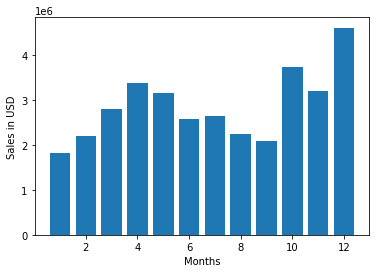

In [15]:
months = range(1, 13)
plt.bar(months, Results['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

In [16]:
Data['City'] = Data['Purchase Address'].apply(lambda x: x.split(',')[1])

C:\Users\caval\AppData\Local\Temp\ipykernel_4620\4020996580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['City'] = Data['Purchase Address'].apply(lambda x: x.split(',')[1])


In [17]:
Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [18]:
Data.groupby(['City']).mean()

,Quantity Ordered,Price Each,Months,Sales
City,,,,
Atlanta,1.115651,186.809233,7.042134,187.856903
Austin,1.125997,182.723232,7.049874,183.703357
Boston,1.130129,182.472648,7.078961,183.688272
Dallas,1.128880,185.737370,7.059379,186.772969
Los Angeles,1.124438,183.125662,7.036818,184.177362
New York City,1.122849,186.339075,7.064681,187.502711
Portland,1.127397,185.138185,7.040915,186.160498
San Francisco,1.123111,183.570190,7.053563,184.704550
Seattle,1.123608,185.534619,7.123337,186.516120


In [19]:
Data.to_csv('City Analysis', index=False)